In [110]:
import matplotlib.pyplot as plt 
import numpy as np
import itertools
import cv2 as cv
from scipy.interpolate import interp1d
from numpy.fft import fft,fft2,ifft,ifft2,fftshift
from scipy import signal
import math
from Functions import *

In [111]:
#Global values for settings and ect
axis_font = {'fontname':'Arial', 'size':'16'}

<h2 style="color:gold">1.1 B</h2>
<p style="color:gold">You need to run this section in order to plot  work properly </p>

In [112]:
#-------defining the 3 signals-----------
fs=200; fs_up=10*fs; fs_down=0.1*fs; L=1
t_down = np.arange(0.0,L,1/fs_down)
t_up = np.arange(0.0,L,1/fs_up)
f_axis = np.arange(-fs/2,fs/2)
f_down = np.arange(-fs_down/2,fs_down/2) ; f_up = np.arange(-fs_up/2,fs_up/2)
f1=10;f2=20;f3=30
A1=5;A2=7;A3=9
f_square = 5 
img = cv.imread("Images/cameraman.tif",cv.IMREAD_GRAYSCALE)
n,m = np.shape(img)
t_img = np.arange(0.0,1.0,1/n) 
f_img =np.arange(-m/2,m/2)
sine1,t = SampledCosine(L,fs,f1,A1,True)
sine2 = SampledCosine(L,fs,f2,A2,True,False)
sine3 = SampledCosine(L,fs,f3,A3,True,False)
s1 = sine1 + sine2+sine3
s2 = np.array(img[0,:],dtype='double')
s3 = signal.square(2*np.pi*f_square*t)
#-------------------------------------------------------
#Prepering signals to ploting
s1_fft = fft(s1) 
s2_fft = fft(s2) 
s3_fft = fft(s3)

s1_interp = interp1d(t,s1,kind="linear",fill_value='extrapolate') 
s2_interp = interp1d(t_img,s2,kind="linear",fill_value='extrapolate') 
s3_interp = interp1d(t,s3,kind="linear",fill_value='extrapolate') 
s1_up = s1_interp(t_up) ; s1_down = s1_interp(t_down)
s2_up = s2_interp(t_up) ; s2_down = s2_interp(t_down)
s3_up = s1_interp(t_up) ; s3_down = s3_interp(t_down)

s1_upFFT = fft(s1_up) ; s1_downFFT = fft(s1_down)
s2_upFFT = fft(s2_up) ; s2_downFFT = fft(s2_down)
s3_upFFT = fft(s3_up) ; s3_downFFT = fft(s3_down)

#---------------------------------------------------------
#Here come time to havy ploting 
xaxis = [t,f_axis,t_up,f_up,t_down,f_down]
plotsSumOfSin = [s1,fftshift(np.abs(s1_fft)),s1_up,fftshift(np.abs(s1_upFFT)),s1_down,fftshift(np.abs(s1_downFFT))]
plotsOfImage  = [s2,fftshift(np.abs(s2_fft)),s2_up,fftshift(np.abs(s2_upFFT)),s2_down,fftshift(np.abs(s2_downFFT))]
plotsOfSquare = [s3,fftshift(np.abs(s3_fft)),s3_up,fftshift(np.abs(s3_upFFT)),s3_down,fftshift(np.abs(s3_downFFT))]

<h2 style="color:green">Sum of sine plots </h2>

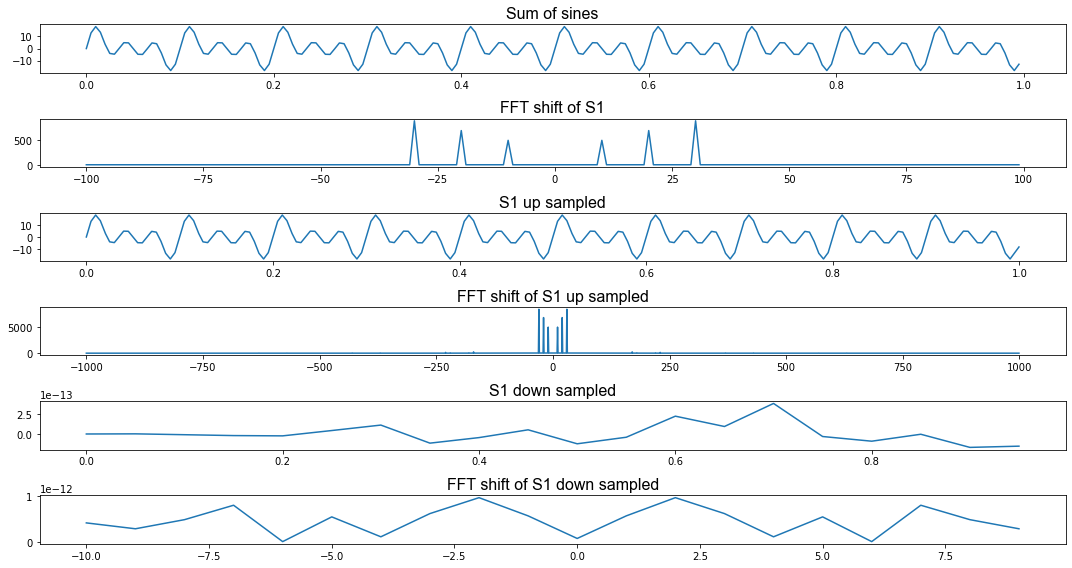

In [113]:
s_title1 = "S1"
s_title2 = "Sum of sines"
titles = [f"{s_title2}", f"FFT shift of {s_title1}" , f"{s_title1} up sampled" 
                 ,f"FFT shift of {s_title1} up sampled" ,f"{s_title1} down sampled",f"FFT shift of {s_title1} down sampled"]
fig,axis = plt.subplots(6,1,figsize=[15,8])
for (title,plot,ax,x) in itertools.zip_longest(titles,plotsSumOfSin,axis,xaxis):
    ax.plot(x,plot)
    ax.set_title(title,**axis_font)
plt.tight_layout()

<h2 style="color:green">Camera man first line plots </h2>

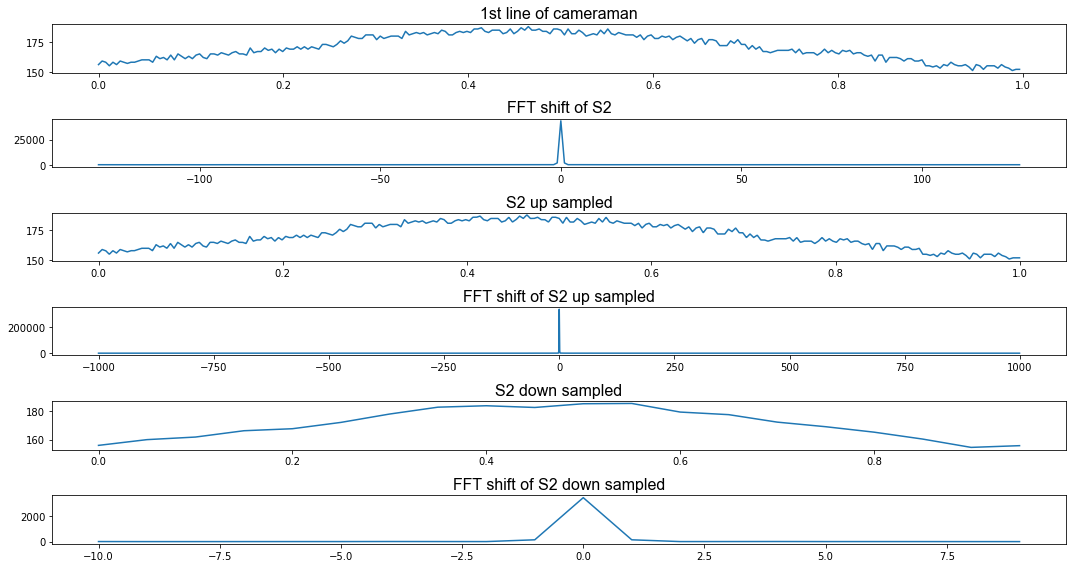

In [114]:
xaxisImg = [t_img,f_img,t_up,f_up,t_down,f_down]
s_title1 = "S2"
s_title2 = "1st line of cameraman"
titles = [f"{s_title2}", f"FFT shift of {s_title1}" , f"{s_title1} up sampled" 
                 ,f"FFT shift of {s_title1} up sampled" ,f"{s_title1} down sampled",f"FFT shift of {s_title1} down sampled"]
fig,axis = plt.subplots(6,1,figsize=[15,8])
for (title,plot,ax,x) in itertools.zip_longest(titles,plotsOfImage,axis,xaxisImg):
    ax.plot(x,plot)
    ax.set_title(title,**axis_font)
plt.tight_layout()

<h2 style="color:green">Square wave plots </h2>

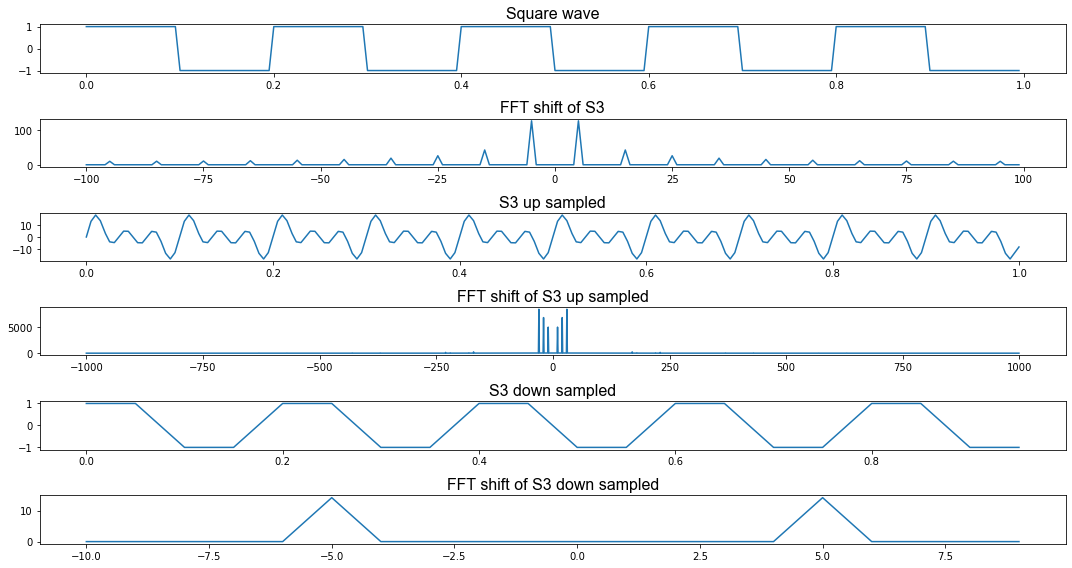

In [115]:
s_title1 = "S3"
s_title2 = "Square wave"
titles = [f"{s_title2}", f"FFT shift of {s_title1}" , f"{s_title1} up sampled" 
                 ,f"FFT shift of {s_title1} up sampled" ,f"{s_title1} down sampled",f"FFT shift of {s_title1} down sampled"]
fig,axis = plt.subplots(6,1,figsize=[15,8])
for (title,plot,ax,x) in itertools.zip_longest(titles,plotsOfSquare,axis,xaxis):
    ax.plot(x,plot)
    ax.set_title(title,**axis_font)
plt.tight_layout()

<h2 style="color:gold">1.1 B</h2>
<p style="color:gold">You need to run this section in order to plot  work properly </p>

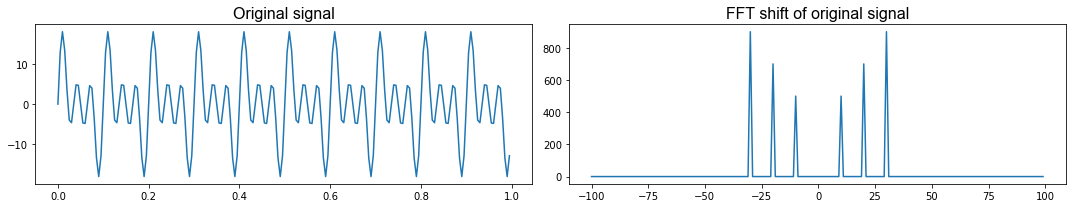

In [116]:
#-------defining the  signal-----------
fs=200;L=1
f_axis = np.arange(-fs/2,fs/2)
f_down = np.arange(-fs_down/2,fs_down/2) 
f_up = np.arange(-fs_up/2,fs_up/2)
f1=10;f2=20;f3=30
A1=5;A2=7;A3=9
sine1,t = SampledCosine(L,fs,f1,A1,True)
sine2 = SampledCosine(L,fs,f2,A2,True,False)
sine3 = SampledCosine(L,fs,f3,A3,True,False)
s1 = sine1 + sine2 + sine3
s1FFT = fft(s1)
xaxis = [t,f_axis]
plotsSumOfSin = [s1,fftshift(np.abs(s1_fft))]
titles = ["Original signal", "FFT shift of original signal"]
fig,axis = plt.subplots(1,2,figsize=[15,3])
for (title,plot,ax,x) in itertools.zip_longest(titles,plotsSumOfSin,axis,xaxis):
    ax.plot(x,plot)
    ax.set_title(title,**axis_font)
plt.tight_layout()

<h2 style="color:green">Downsampling </h2>

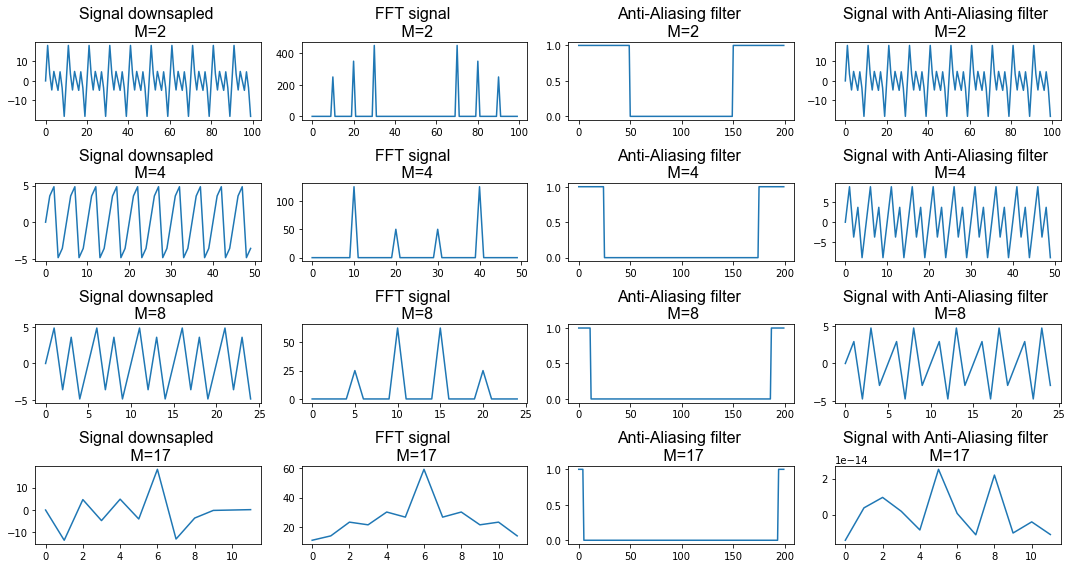

In [129]:
fs=200; fs_down=[fs/2,fs/4,fs/8,fs/17]
t_down = [] ; f_down = []
for downSample in fs_down:
 t_down.append(np.arange(0.0,L,1/downSample))
 f_down.append(np.arange(-downSample/2,downSample/2))
s1_interp = interp1d(t,s1,kind="linear",fill_value='extrapolate')
downsapledPlots=[] ; FFTPlots=[] ;AFFList = [];filteredSignal = []

for (downSample,samples) in itertools.zip_longest(t_down,fs_down):
    AAF=np.zeros(fs,dtype='int')
    AAF[:math.floor(samples/2)] = 1 
    AAF[math.floor(fs-samples/2):]=1
    AFFList.append(AAF)
    downsapledPlots.append(s1_interp(downSample))
    FFTPlots.append(np.abs(fft(s1_interp(downSample))))

for (AAF , tDown) in itertools.zip_longest(AFFList,t_down):
    s1_filtered = np.real(ifft(s1FFT * AAF))
    filteredSignal.append(interp1d(t,s1_filtered,kind="linear",fill_value='extrapolate')(tDown))
for (FFTPlots)
plots = [downsapledPlots,FFTPlots,AFFList,filteredSignal]
tSamples = ["2","4","8","17"]
titles = ["Signal downsapled \n M=","FFT signal \n M=" ,"Anti-Aliasing filter \n M=","Signal with Anti-Aliasing filter \n M="]
figure , axis = plt.subplots(4,4,figsize=[15,8])
for (ax,samples,index) in itertools.zip_longest(axis,tSamples , range(0,4)):
    for(a,title,plot) in itertools.zip_longest(ax,titles,plots):
        a.plot(np.real(plot[index]))
        a.set_title(title+samples,**axis_font)
plt.tight_layout()